# MNIST KNN Classifier with over 97% accuracy

## Fetching the MNIST dataset

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Seperating dataset into data and labels

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
some_digit = X[0]

In [8]:
some_digit_image = some_digit.reshape(28,28)

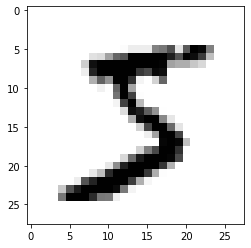

In [9]:
plt.imshow(some_digit_image, cmap='binary')

In [10]:
y[0]

'5'

In [11]:
y = y.astype(np.uint8)

## Settig aside the test set, MNIST dataset is already prepared

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Using KNN classifier as recommended in the book

In [16]:
knn_clf = KNeighborsClassifier()

In [17]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
knn_clf.predict([some_digit])

array([5], dtype=uint8)

## Defining a param grid to be searched from

In [19]:
param_grid = {
    'n_neighbors': [4, 5, 6],
    'weights': ['uniform', 'distance']
}

In [20]:
grid_search = GridSearchCV(knn_clf, param_grid=param_grid)

In [21]:
grid_search.fit(X_train, y_train) 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [27]:
grid_search.cv_results_['rank_test_score']

array([5, 1, 4, 3, 6, 2])

In [33]:
grid_search.cv_results_['mean_test_score']

array([0.9685    , 0.97161667, 0.96928333, 0.97041667, 0.9681    ,
       0.97123333])

In [47]:
grid_search.cv_results_['params'][1]

{'n_neighbors': 4, 'weights': 'distance'}

## Best results from GridSearchCV

In [44]:
grid_search.best_score_

0.9716166666666666

## Best param combination

In [46]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

## Initializing the KNN Classifier with the params acquired from the grid search

In [38]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [39]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

## Evaluating the newly trained classifer

In [40]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [41]:
f1_score(y_train, y_train_knn_pred, average='macro')

0.9701570373282289

In [49]:
y_pred = knn_clf.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.9714